In [5]:
# Cell 1: Imports and setup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [6]:
# Cell 2: Load and inspect dataset
df = pd.read_csv('../data/labeled_data.csv')  # adjust path if needed
print("Shape:", df.shape)
print("Columns:", df.columns)
print(df.head())

Shape: (24783, 7)
Columns: Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')
   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


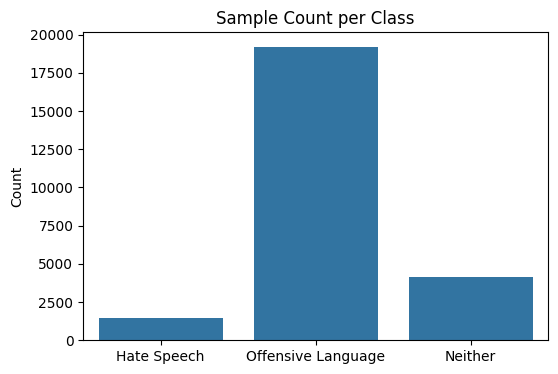

Class counts:
 class
0     1430
1    19190
2     4163
Name: count, dtype: int64


In [7]:
# Cell 3: Show class distribution
class_counts = df['class'].value_counts().sort_index()
class_names = ['Hate Speech', 'Offensive Language', 'Neither']
plt.figure(figsize=(6,4))
sns.barplot(x=class_names, y=class_counts.values)
plt.title('Sample Count per Class')
plt.ylabel('Count')
plt.show()
print("Class counts:\n", class_counts)

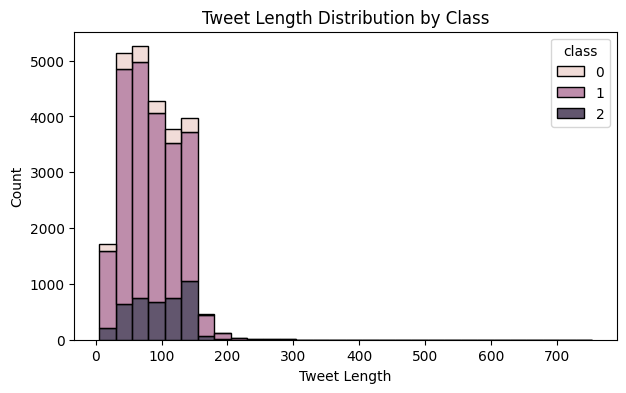

Avg. tweet length per class:
 class
0    84.586713
1    83.457113
2    94.850108
Name: tweet_length, dtype: float64


In [8]:
# Cell 4: Tweet length statistics and visualization
df['tweet_length'] = df['tweet'].str.len()
plt.figure(figsize=(7,4))
sns.histplot(data=df, x='tweet_length', hue='class', bins=30, multiple='stack')
plt.title('Tweet Length Distribution by Class')
plt.xlabel('Tweet Length')
plt.show()
print("Avg. tweet length per class:\n", df.groupby('class')['tweet_length'].mean())

In [9]:
# Cell 5: Show sample tweets for each class
for label, name in zip([0, 1, 2], class_names):
    print(f"\n{name} samples:")
    samples = df[df['class'] == label]['tweet'].sample(3, random_state=1).tolist()
    for s in samples:
        print("-", s)


Hate Speech samples:
- People who play #roleplayinggames are human filth and don't deserve the same respect you'd give a mosquito. They're soulless gutter trash.
- RT @MANIAC3X: @NotoriousBM95 @Woody_AFC @_WhitePonyJr_ @santi_4l @Bamoose12 start crying and stalking him faggot. I want to laff
- That fucking slutty beaner

Offensive Language samples:
- Some niggah said sugapuss to me lastnight &#128569;&#128569;&#128569;
- @_lexisperez he ate my pussy i could..
- @ThatKid_Vicente thanks little bitch &#128526;

Neither samples:
- Can I double stuff your Oreo?
- @TheMayorMatt @Frizzle18 I like where ur domes at #smart
- @YesseSmith I was born yellow


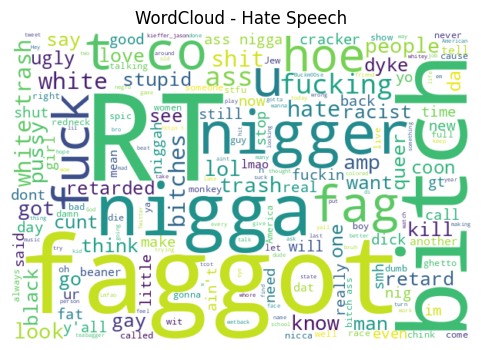

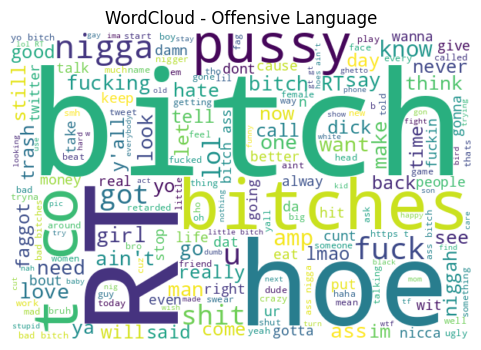

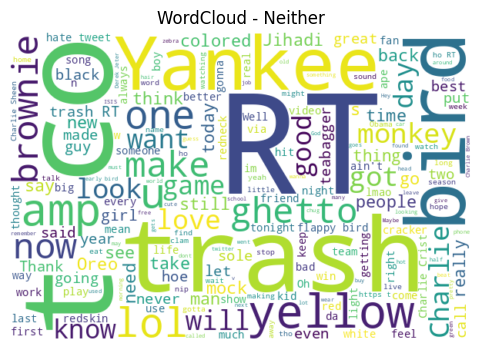

In [10]:
# Cell 6: WordCloud for each class (optional, may need wordcloud library)
for label, name in zip([0,1,2], class_names):
    text = ' '.join(df[df['class']==label]['tweet'])
    wc = WordCloud(width=600, height=400, background_color='white').generate(text)
    plt.figure(figsize=(6,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud - {name}')
    plt.show()

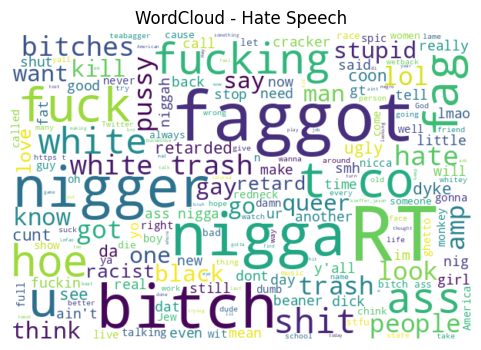

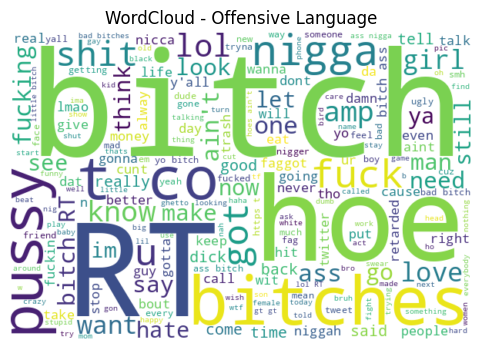

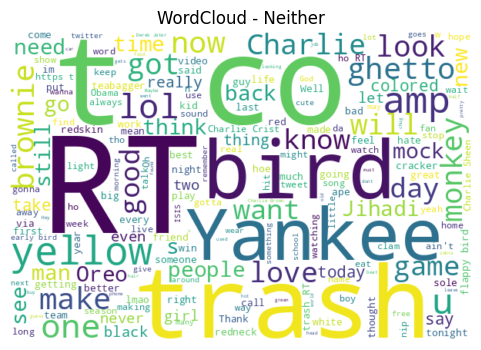

<Figure size 640x480 with 0 Axes>

In [11]:
for label, name in zip([0,1,2], class_names):
    text = ' '.join(df[df['class']==label]['tweet'])
    wc = WordCloud(width=600, height=400, background_color='white').generate(text)
    plt.figure(figsize=(6,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'WordCloud - {name}')
    plt.savefig(f'../saved_models/wordcloud_{name.replace(" ", "_").lower()}.png')  # Save to disk
    plt.show()
plt.savefig('../saved_models/class_distribution.png')
plt.show()
